# Other Adaptations of Bivariate Plots

You saw earlier in this section one other way of expanding univariate plots into bivariate plots by substituting count on a [bar chart](https://github.com/A2Amir/Data-Visualization-in-Data-Science-Process/blob/master/Code/Adapted%20Bar%20Charts.ipynb) or [histogram](https://github.com/A2Amir/Data-Visualization-in-Data-Science-Process/blob/master/Code/Adapted%20Histograms.ipynb) for the mean, median, or some other statistic of a second variable. This adaptation can also be done for bivariate plots like the heat map, clustered bar chart, and line plot, to allow them to depict multivariate relationships.

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('../Code/fuel-econ.csv')
sedan_classes = ['Minicompact Cars','Subcompact Cars','Compact Cars','Midsize Cars','Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
df.VClass = df.VClass.astype(vclasses)
df['trans_type'] = df.trans.apply(lambda x: x.split()[0])
df.head(5)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


If we want to depict the mean of a third variable (here mean(co2)) in a 2-d histogram, we need to change the weights of points in the hist2d function similar to how we changed the weights in [this 1-d histogram](https://github.com/A2Amir/Data-Visualization-in-Data-Science-Process/blob/master/Code/Adapted%20Histograms.ipynb).

In [4]:
ybin_edges = np.arange(df.comb.min(), df.comb.max()+3, 3 )
xbin_edges = np.arange(df.displ.min(), df.displ.max()+0.3, 0.3 )

# in each bin each point falls
ybin_idxs = pd.cut(df.comb, ybin_edges, right= False, include_lowest = True, labels = False).astype(int)
xbin_idxs = pd.cut(df.displ, xbin_edges, right= False, include_lowest=False, labels = False).astype(int)

# count number of points in each bin 
n_points = df.groupby([xbin_idxs,ybin_idxs]).size()
n_points = n_points.reset_index().pivot(index='displ', columns='comb').values

co2_weights = df.co2 / n_points[xbin_idxs,ybin_idxs]

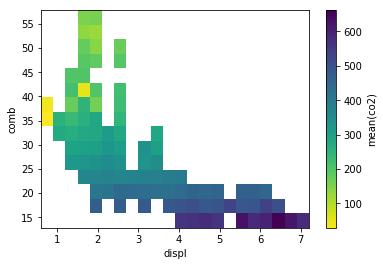

In [5]:
# plot the data using the calculated weights
plt.hist2d(data = df, x = 'displ', y = 'comb', weights = co2_weights,
           bins = [xbin_edges, ybin_edges], cmap = 'viridis_r', cmin = 0.5);
plt.xlabel('displ')
plt.ylabel('comb');
plt.colorbar(label = 'mean(co2)');

Considering how few data points there are in the example, and how cleanly the third variable is distributed, the adapted heat map is a bit excessive in terms of work. The low level of point overlap observed earlier means that the scatterplot with color or size encoding was sufficient for depicting the data. You'll be more likely to use the heat map if there is a lot of data to be aggregated.

# Adopted Heatmap

The code for the **2-d bar chart** doesn't actually change much. The actual **heatmap** call is still the same, only the aggregation of values changes. Instead of taking **size** after the **groupby** operation, we compute the mean across dataframe columns and isolate the column of interest.

In [33]:
cat_means =  df.groupby(['trans_type','VClass']).mean()['comb']
cat_means = cat_means.reset_index(name = 'comb_avg')
cat_means = cat_means.pivot(index='VClass', columns='trans_type', values='comb_avg')

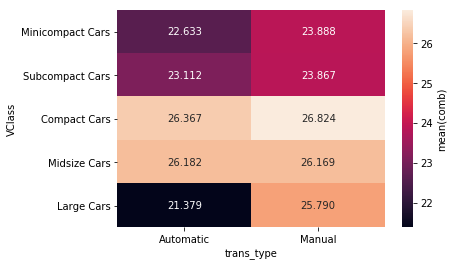

In [39]:
sb.heatmap(cat_means, annot=True, fmt='0.3f', cbar_kws={'label':'mean(comb)'}  )

**Note** how the "cbar_kws" provides an additional argument to the colorbar component of the heat map call.

# Adapted clustered bar chart

An alternative approach for two categorical variables and one numeric variable is to adapt **a clustered bar chart** using the barplot function instead of the countplot function:

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

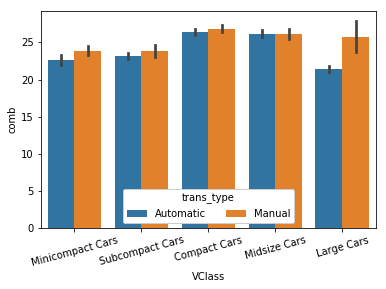

In [42]:
ax = sb.barplot(data=df, x='VClass', y='comb', hue='trans_type')
ax.legend(loc=8, ncol=3, framealpha=1, title='trans_type')
plt.xticks(rotation=15)

The **"hue"** parameter can also be used in a similar fashion in the **boxplot, violinplot, and pointplot** functions to add a categorical third variable to those plots in a clustered fashion.


# Adapted point plot


As a special note for pointplot, the default rendering aligns all levels of the "hue" categorical variable vertically. Use the **"dodge"** parameter to shift the levels in a clustered fashion:

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

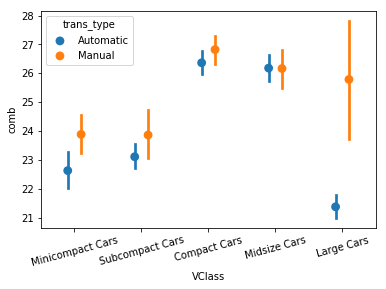

In [47]:
ax = sb.pointplot(data=df, x='VClass', y='comb', hue='trans_type', dodge= 0.2, linestyles = "")
plt.xticks(rotation=15)

# Adopted line plot

As a final example, a line plot can be adapted from previous code showing how to create frequency polygons for levels of a categorical variable. In this case as well, we create **a custom function** to send to a **FacetGrid object's map** function that computes the means in each bin, then plots them as lines via **errorbar**.

In [55]:
def mean_ploy(x, y, bins = 10, **kwargs ):
    """Custome adopted line plot Code"""
    
    #set each bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    
    bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
    
    #compute counts
    data_bins = pd.cut(x, bins, right=False, include_lowest=True)
    
    means = y.groupby(data_bins).mean()
    
    #create a plot
    plt.errorbar(x=bin_centers, y = means, **kwargs)
    

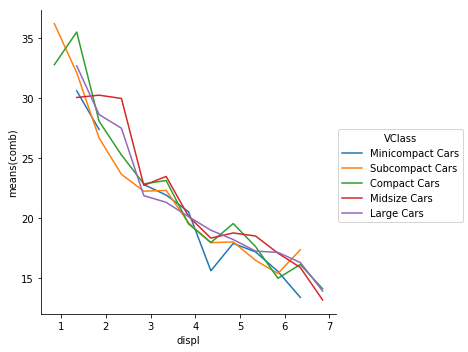

In [56]:
bin_edges = np.arange(df.displ.min(), df.displ.max()+0.5, 0.5)
g = sb.FacetGrid(data= df, hue='VClass', size=5)
g.map(mean_ploy, 'displ', 'comb', bins=bin_edges)
g.set_ylabels('means(comb)')
g.add_legend()

# Adopted Boxplot

Plot the relationship between engine size ('displ', in meters), vehicle class, and fuel type ('fuelType'). For the lattermost feature, focus only on Premium Gasoline and Regular Gasoline cars. What kind of relationships can you spot in this plot?

C:\Users\ziaeeamir\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


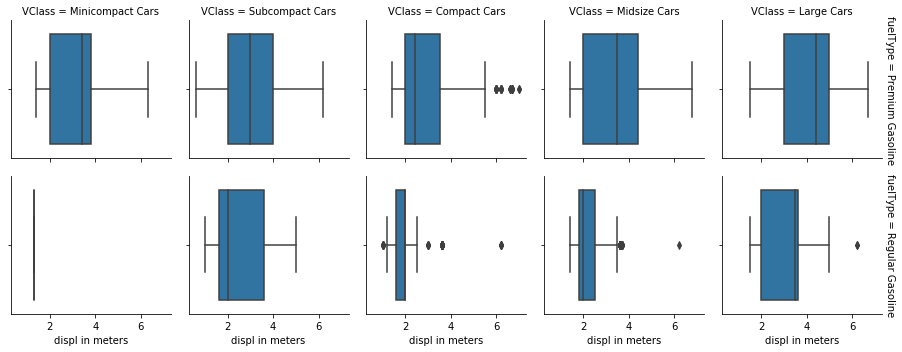

In [62]:
# YOUR CODE HERE
fuelType = ['Premium Gasoline', 'Regular Gasoline']
df1 = df.loc[df.fuelType.isin(fuelType)]
base_color=sb.color_palette()[0]
g = sb.FacetGrid(data=df1, col='VClass', row='fuelType', size=2.5, margin_titles=True)
g.map(sb.boxplot, 'displ', color=sb.color_palette()[0])
g.set_xlabels('displ in meters')


Onther solution

Text(0,0.5,' engine size (displ) in meter ')

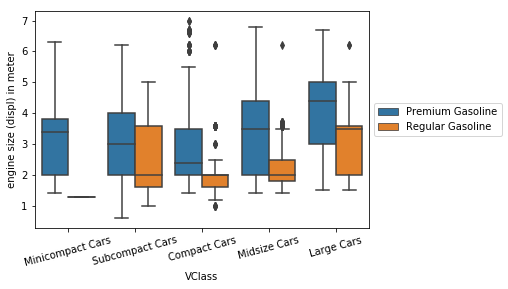

In [71]:
sb.boxplot(data = df1, x='VClass', y = 'displ', hue = 'fuelType')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5))# legend to right of figure
plt.xticks(rotation = 15)
plt.ylabel(' engine size (displ) in meter ')
